In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('gold.csv')
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7


In [3]:
# Check for missing values
print(data.isnull().sum())

Date           0
Close/Last     0
Volume        28
Open           0
High           0
Low            0
dtype: int64


In [4]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.drop(columns='Date')), columns=data.columns.drop('Date'))

In [5]:
# Define the feature columns (X) and the target variable (Y)
X = data_imputed.drop(columns='Close/Last')  # Assuming 'Close/Last' is the target column
Y = data_imputed['Close/Last']

In [7]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

LinearRegression()

In [9]:
# Predict the gold prices on the test data
Y_pred = model.predict(X_test)

In [10]:
# Calculate the Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate the R-squared value
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 34.99
R-squared: 1.00


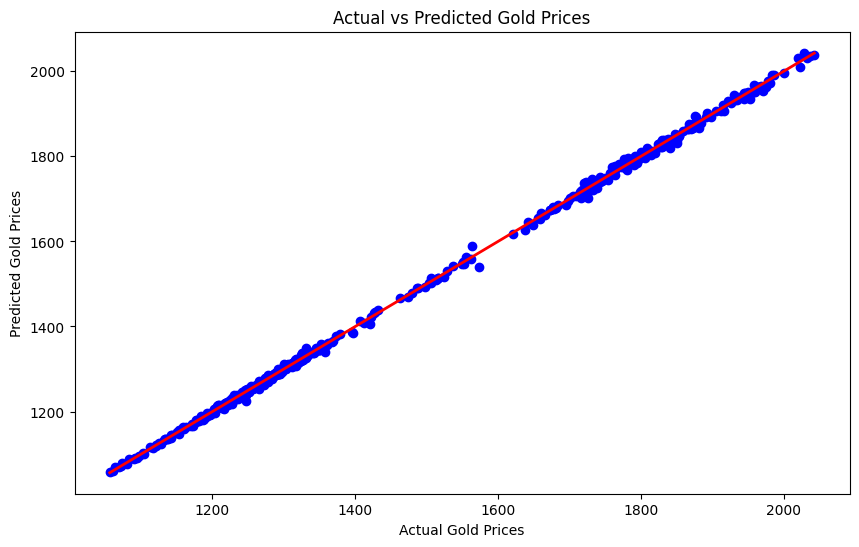

In [11]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.xlabel('Actual Gold Prices')
plt.ylabel('Predicted Gold Prices')
plt.title('Actual vs Predicted Gold Prices')
plt.show()

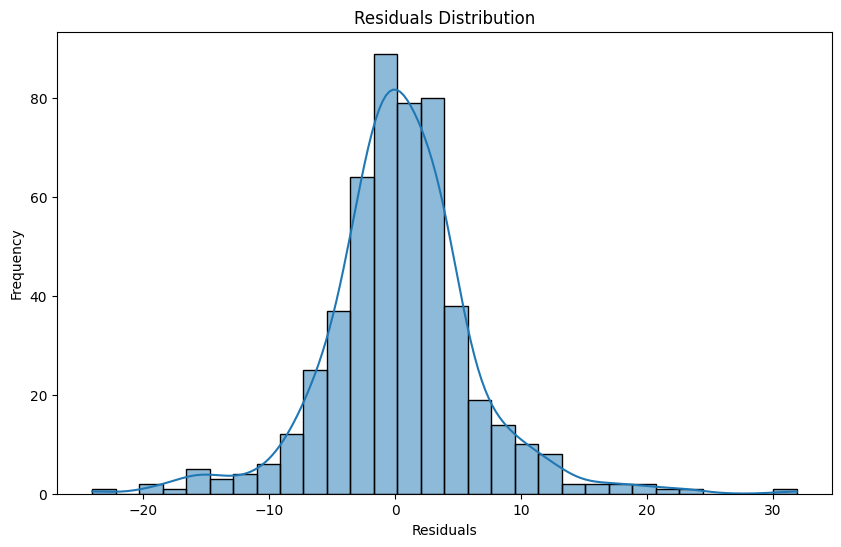

In [12]:
# Visualize the residuals
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Function to take user input for prediction
def get_user_input():
    input_data = []
    for feature in X.columns:
        value = float(input(f"Enter value for {feature}: "))
        input_data.append(value)
    return np.array(input_data).reshape(1, -1)

# Get user input
user_input = get_user_input()

# Predict the gold price based on user input
predicted_price = model.predict(user_input)

# Output the predicted price
print(f'The predicted gold price is: {predicted_price[0]:.2f}')

Enter value for Volume: 1000000
Enter value for Open: 1800.50
Enter value for High: 1815.75
Enter value for Low: 1795.25
The predicted gold price is: 1806.58


C:\Users\faiza\.conda\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
